In [1]:
import numpy as np
import matplotlib.pyplot as plt

Generate Synthetic Data

In [2]:
np.random.seed(42)

# X: 50 points between 0 and 100
X = np.random.rand(50, 1) * 100

# True relation: y = 3.5x + noise
noise = np.random.randn(50, 1) * 20
y = 3.5 * X + noise

**Feature Scaling**
+ Mean Normalization
+ Standardization

In [3]:
def mean_normalization(X):
    X_min = X.min(axis=0)
    X_max = X.max(axis=0)
    X_mean = X.mean(axis=0)
    return (X - X_mean) / (X_max - X_min + 1e-8), X_mean, X_min, X_max

def standardization(X):
    X_mean = X.mean(axis=0)
    X_std = X.std(axis=0)
    return (X - X_mean) / (X_std + 1e-8), X_mean, X_std


In [4]:
#For gradient descent, standardization usually works very well
X_scaled, X_mean, X_std = standardization(X)

**Add Bias Term**

In [5]:
def add_bias_term(X):
    # X: (n_samples, n_features)
    n_samples = X.shape[0]
    ones = np.ones((n_samples, 1))
    return np.hstack([ones, X])

X_train = add_bias_term(X_scaled)   # shape: (50, 2) → [1, x_scaled]
y_train = y                         # shape: (50, 1)


**Loss Functions: MAE, MSE, RMSE**

In [6]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))


**Gradient Descent for Linear Regression (MSE)**

In [7]:
def compute_cost(X, y, w):
    """
    X: (m, n)  – features with bias
    y: (m, 1)
    w: (n, 1)
    """
    m = len(y)
    y_pred = X @ w
    cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
    return cost

def gradient_descent(X, y, alpha=0.01, n_iters=1000):
    m, n = X.shape
    w = np.zeros((n, 1))  # initialize weights [w0, w1, ...]^T
    cost_history = []

    for i in range(n_iters):
        y_pred = X @ w
        # gradient: (1/m) * X^T (y_pred - y)
        gradient = (1 / m) * (X.T @ (y_pred - y))
        w = w - alpha * gradient

        cost = compute_cost(X, y, w)
        cost_history.append(cost)

    return w, cost_history


**Train the model**

In [8]:
alpha = 0.01
n_iters = 1000

w_learned, cost_history = gradient_descent(X_train, y_train, alpha, n_iters)
print("Learned weights (w0: intercept in scaled space, w1: slope in scaled space):")
print(w_learned)


Learned weights (w0: intercept in scaled space, w1: slope in scaled space):
[[156.00772549]
 [ 98.81070446]]


**Evaluate with MAE, MSE, RMSE**

In [9]:
y_pred = X_train @ w_learned

print("MAE :", mae(y_train, y_pred))
print("MSE :", mse(y_train, y_pred))
print("RMSE:", rmse(y_train, y_pred))

MAE : 14.613043569528317
MSE : 329.22852106272717
RMSE: 18.14465544072764


+ MAE  = 14.61
+ MSE  = 329.22
+ RMSE = 18.14

**Plot 1: Loss Curve (to see gradient descent learning)**

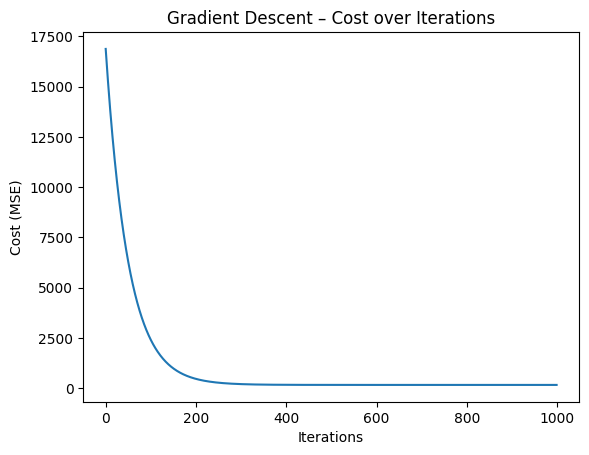

In [10]:
plt.figure()
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent – Cost over Iterations")
plt.show()

The cost function (MSE) decreases sharply during the initial iterations, showing that gradient descent is effectively learning and reducing errors quickly. After around 200 iterations, the curve begins to flatten, indicating that the model is converging and further improvements become minimal. This confirms that the chosen learning rate and iteration count are appropriate, and gradient descent successfully found near-optimal parameters.

the cost decreasing and then flattening.

**Plot 2: Regression Line vs Data (in original X scale)**

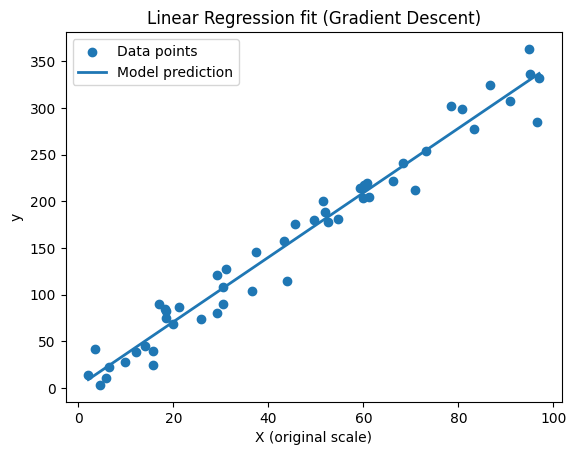

In [11]:
# Sort by X for a clean line plot
sorted_idx = np.argsort(X[:, 0])
X_sorted = X[sorted_idx]
X_scaled_sorted = X_scaled[sorted_idx]
X_train_sorted = add_bias_term(X_scaled_sorted)
y_sorted = y[sorted_idx]

y_pred_sorted = X_train_sorted @ w_learned

plt.figure()
plt.scatter(X_sorted, y_sorted, label="Data points")
plt.plot(X_sorted, y_pred_sorted, label="Model prediction", linewidth=2)
plt.xlabel("X (original scale)")
plt.ylabel("y")
plt.title("Linear Regression fit (Gradient Descent)")
plt.legend()
plt.show()


The regression line captures the overall increasing trend between the input variable (X) and output (y), demonstrating a strong linear relationship. Most of the data points lie close to the line, indicating that the model fits the data well. Some deviations from the line are due to the added noise in the dataset, but the general pattern confirms that Linear Regression is a suitable model for this relationship.

**Plot 3: Residual Plot (for analysis)**

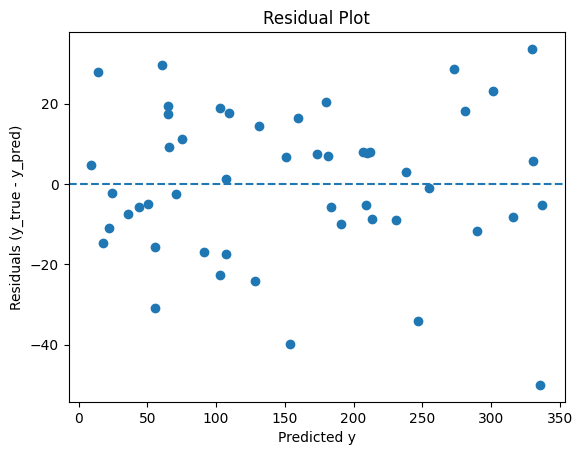

In [12]:
residuals = y_train - y_pred

plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(0, linestyle="--")
plt.xlabel("Predicted y")
plt.ylabel("Residuals (y_true - y_pred)")
plt.title("Residual Plot")
plt.show()


The residuals are randomly scattered around the zero line, without forming any visible pattern. This indicates that the errors have no systematic trend and are approximately normally distributed. It suggests that the linearity assumption holds true, and the model does not suffer from major bias or underfitting. However, a few larger residuals indicate the possible presence of noise or mild outliers.